In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##You just made your own Logistic Regresion Library (Sort of)
You can use this model for any logistic regression problem you have. Make a new notebook and call this class using "from LogRegScratch import LogisticRegression"

In [ ]:
class sigmoid:
    def sigmoid(z):
        a=1.0/(1.0+ np.exp(-z))
        return a
    def derivative(self,z):
        return self.sigmoid(z)*(1-self.sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr=learning_rate
        self.epochs=epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)

        for i in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)
            #cross-entropy loss function
            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples
            self.weights -= self.lr* dw
            self.bias-= self.lr* db

    def predict(self, X):
        y_pred = np.dot(X,self.weights)+self.bias

        for i in range(len(y_pred)):
            if y_pred[i]<= 0.5:
                y_pred[i] = 0
            else:
                y_pred[i] = 1   
        return y_pred

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate classification data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict the output
y_pred = logreg.predict(X_test)

LogisticRegression()

In [ ]:
# Evaluate the output
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.92
[[39  4]
 [ 4 53]]


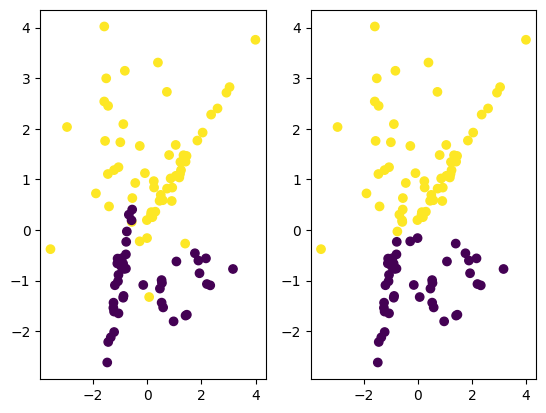

In [ ]:
plt.subplot(1,2,1)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

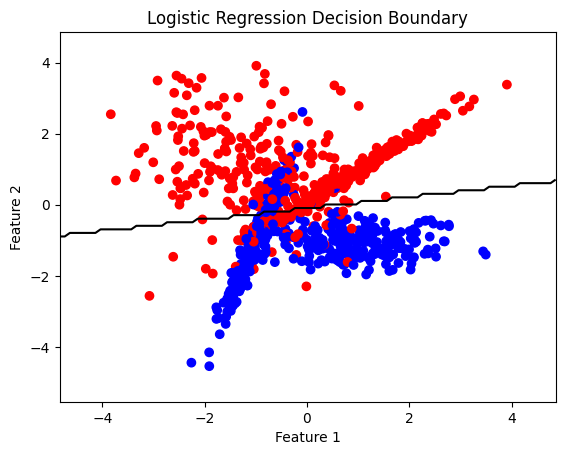

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')

# Plot the decision boundary
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = logreg.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, levels=[0.5], colors='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()
